## contents
### 01 import libraries & data
### 02 create "const_total_hours" column from "const_total_minutes" column
### 03 redo correlation heatmap

## 01 import libraries and data

In [3]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
#import data
path = r'C:\Users\erhil\OneDrive\Career Foundry Program\Immersion Data Analytics Course\A6 - Adv. Analytics & Dashboard Design\Project A6'
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared', 'merged3.csv'), index_col = False)

In [5]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,...,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,...,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,...,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,...,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,...,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000


In [6]:
df.shape

(5153650, 22)

## 02 create "const_total_hours" column from "const_total_minutes" column

In [7]:
#create new column to represent the construction time in hours
df['const_total_hours'] = df.const_total_minutes/60

In [8]:
df.shape

(5153650, 23)

In [9]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_minutes,const_total_hours
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,...,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,23.500000,0.391667
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,...,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,121.416667,2.023611
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,...,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,11352.833333,189.213889
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,...,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,1746.900000,29.115000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,...,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,29.000000,0.483333


In [10]:
#drop construction time in minutes column
df.drop(columns = ['const_total_minutes'], inplace = True)

In [11]:
df.shape

(5153650, 22)

In [12]:
df.head()

,ID,Severity,Distance(mi),City,County,State,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),...,Precipitation(in),Weather_Condition,Start_Time_no_ext,End_Time_no_ext,Zipcode_no_ext,Airport_Type,Airport_Name,dist_to_weather(mi),project_time_length,const_total_hours
0,C-2,2,0.433173,Lafayette,Lafayette,LA,US/Central,KLFT,2021-11-12 07:59:00,55.0,...,0.0,Mostly Cloudy,2021-11-12 07:59:00,2021-11-12 08:22:30,70501,large_airport,Lafayette Regional Airport,1.673991,0 days 00:23:30,0.391667
1,C-3,2,0.192266,Denver,Denver,CO,US/Mountain,KBKF,2021-10-12 06:58:00,37.0,...,0.0,Partly Cloudy,2021-10-12 07:17:30,2021-10-12 09:18:55,80224,medium_airport,Buckley Air Force Base,9.058579,0 days 02:01:25,2.023611
2,C-4,4,0.032112,Whittier,Los Angeles,CA,US/Pacific,KFUL,2021-02-10 02:53:00,54.0,...,0.0,Cloudy,2021-02-10 02:46:10,2021-02-17 23:59:00,90605,small_airport,Fullerton Municipal Airport,6.800913,7 days 21:12:50,189.213889
3,C-5,2,0.996057,Connellsville,Fayette,PA,US/Eastern,KLBE,2020-09-24 15:53:00,73.0,...,0.0,Partly Cloudy,2020-09-24 15:58:00,2020-09-25 21:04:54,15425,medium_airport,Arnold Palmer Regional Airport,21.136875,1 days 05:06:54,29.115000
4,C-6,2,0.747595,Dallas,Dallas,TX,US/Central,KDAL,2021-06-08 21:53:00,84.0,...,0.0,Partly Cloudy,2021-06-08 21:35:00,2021-06-08 22:04:00,75247,large_airport,Dallas Love Field,2.452856,0 days 00:29:00,0.483333


In [13]:
#export final dataset with construction hours column
df.to_csv(os.path.join(path, 'merged_final.csv'), index = False)

## 03 correlation heatmap

In [14]:
#create subset of df with only numeric variables
df1=df[['Severity', 'Distance(mi)', 'Temperature(F)', 'Visibility(mi)', 'Precipitation(in)', 'const_total_hours','dist_to_weather(mi)']]

C:\Users\erhil\AppData\Local\Temp/ipykernel_21316/3165861024.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout() #so nothing gets cut off when exporting


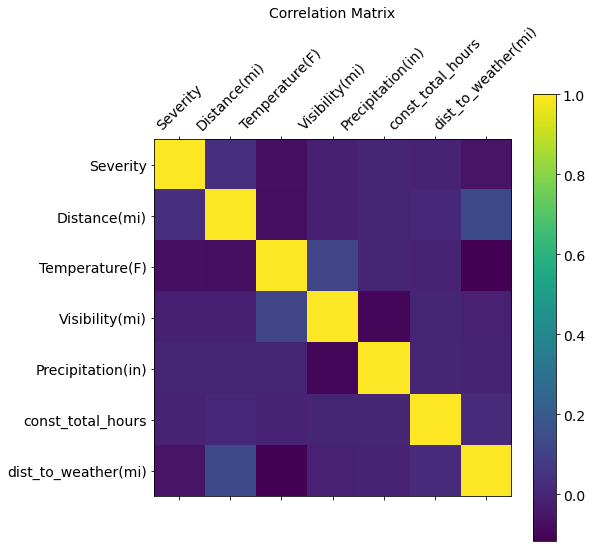

In [15]:
#show correlation matrix with increased size, added colorbar, labels, and title
f = plt.figure(figsize=(8, 8)) # figure size 
plt.matshow(df1.corr(), fignum=f.number) # type of plot
plt.xticks(range(df1.shape[1]), df1.columns, fontsize=14, rotation=45) # x axis labels
plt.yticks(range(df1.shape[1]), df1.columns, fontsize=14) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=14) # add font size
plt.title('Correlation Matrix', fontsize=14) # add title
plt.tight_layout() #so nothing gets cut off when exporting

There still appears to have little to no correlation in the numeric variables here. 

In [16]:
f.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'correlations_final.png'))